<h1><font color='blue'> Doners Choose EDA


In [99]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
- ### 1)1 Reading data

In [2]:
project_data = pd.read_csv('../datafiles/doners/train_data.csv')
resourse_data = pd.read_csv('../datafiles/doners/resources.csv')

In [3]:
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [4]:
resourse_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [5]:
project_data.info(),print('-'*100),resourse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

(None, None, None)

In [6]:
project_data.shape,resourse_data.shape

((109248, 17), (1541272, 4))

---
- ### 1)2 Exploring Data 

In [7]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

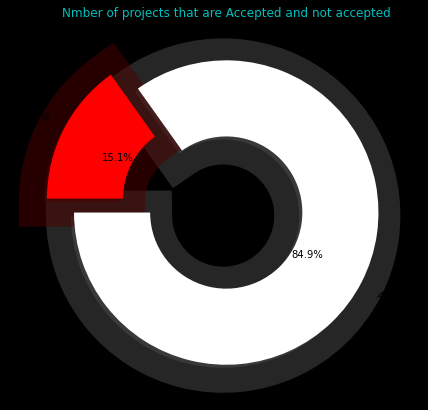

In [8]:
fig1, ax1 = plt.subplots(figsize=(7,7),facecolor='k')
title_obj=ax1.set_title("Nmber of projects that are Accepted and not accepted")
plt.setp(title_obj, color='c')  
labels = ['Accepted','Rejected']
sizes = list(project_data['project_is_approved'].value_counts())
explode = (0, 0.2)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,
startangle=180,wedgeprops=dict(width=0.5,linewidth= 50),colors=('w','r'),rotatelabels=True)
plt.show()

In [25]:
print('------This displays the avg. projects/teacher and the approval rate for an state--------')
project_data.groupby('school_state').mean().sort_values('project_is_approved',ascending=False)

------This displays the avg. projects/teacher and the approval rate for an state--------


,Unnamed: 0,teacher_number_of_previously_posted_projects,project_is_approved
school_state,,,
DE,93584.597668,17.446064,0.897959
ND,90233.000000,7.608392,0.888112
WA,91825.596401,9.931020,0.876178
OH,93193.837860,8.781516,0.875152
NH,92595.341954,6.152299,0.873563
CT,91666.775105,13.293446,0.868912
KY,92219.343558,14.462423,0.863497
MA,92253.383424,7.873587,0.860193
SC,90411.065549,8.740091,0.860010


In [78]:
temp = pd.DataFrame()
temp['states']=project_data['school_state']

In [134]:
swar = pd.DataFrame(project_data.groupby('school_state')['project_is_approved'].value_counts())
swar2 = pd.DataFrame(swar.xs(1, level=1, drop_level=False))
swar2['total']=list(swar.groupby('school_state').sum()['project_is_approved'])

In [135]:
swar3 =swar2.droplevel(1)
swar3.sort_values('total',ascending=False,inplace=True)
swar3;

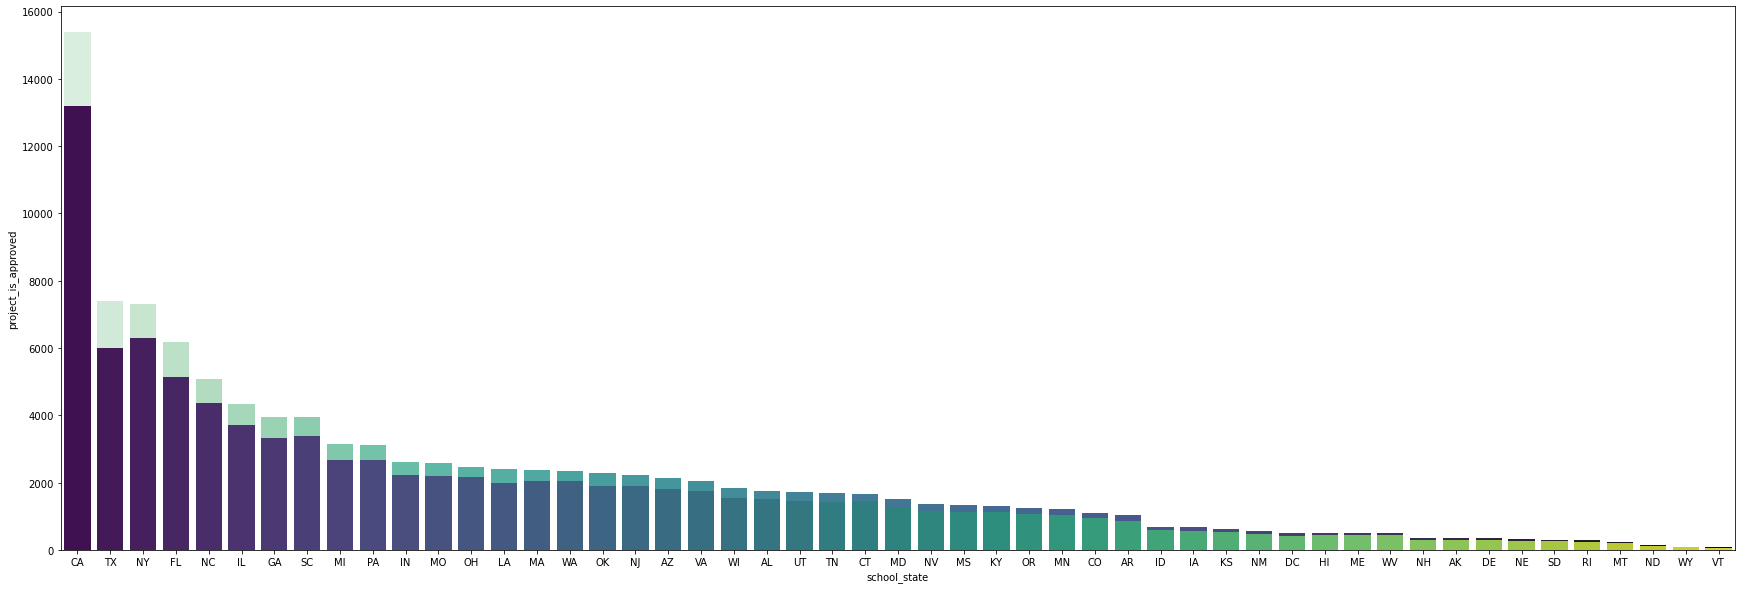

In [146]:
# sns.barplot(x=project_data['school_state'],y=swar2['total'])
fig=plt.figure(figsize=(30,10))
sns.barplot(data=swar3,x=swar3.index,y='total',palette='mako_r')
br = sns.barplot(data=swar3,x=swar3.index,y='project_is_approved',palette = "viridis")

In [56]:
swar['total']=swar.groupby('school_state').sum()

In [77]:
temp = pd.DataFrame(project_data.groupby('school_state')['project_is_approved'].agg(lambda x: x[x==0].count()))
temp

,project_is_approved
school_state,
AK,55
AL,256
AR,177
AZ,347
CA,2183
CO,176
CT,218
DC,102
DE,35


In [75]:
swar

project_is_approved
school_state project_is_approved                     
AK           1                                    290
             0                                     55
AL           1                                   1506
             0                                    256
AR           1                                    872
...                                               ...
WI           0                                    282
WV           1                                    430
             0                                     73
WY           1                                     82
             0                                     16

[102 rows x 1 columns]